# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns # 另一個繪圖-樣式套件
# 設定 data_path
dir_data = 'data/'

### 之前做過的處理

In [3]:


# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_train
f_app_train = pd.read_csv(dir_data+'application_train.csv')
#f_app_train.shape

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in f_app_train:
    if f_app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(f_app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            f_app_train[col] = le.fit_transform(f_app_train[col])            
print(f_app_train.shape)
f_app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
f_app_train['DAYS_EMPLOYED_ANOM'] = f_app_train["DAYS_EMPLOYED"] == 365243
f_app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
f_app_train['DAYS_BIRTH'] = abs(f_app_train['DAYS_BIRTH'])


In [6]:


f_app_train["DAYS_BIRTH_age_grp"] = f_app_train['DAYS_BIRTH']/365
#f_app_train['TARGET']



In [10]:
#自 20 到 70 歲，切 11 個點 (得到 10 組)
begin=f_app_train['DAYS_BIRTH_age_grp']>=20
end=f_app_train['DAYS_BIRTH_age_grp']<=70
data=f_app_train[(begin&end)]

bin_cut =  11
f_app_train['YEARS_BINNED'] = pd.cut(f_app_train['DAYS_BIRTH_age_grp'], bins = bin_cut) 

# 顯示不同組的數量
print(f_app_train['YEARS_BINNED'].value_counts())
f_app_train.head()

(38.192, 42.61]     38108
(33.773, 38.192]    36195
(29.355, 33.773]    35088
(42.61, 47.028]     34019
(51.447, 55.865]    31287
(47.028, 51.447]    29772
(55.865, 60.284]    29229
(24.936, 29.355]    28156
(60.284, 64.702]    24079
(20.469, 24.936]    11860
(64.702, 69.121]     9718
Name: YEARS_BINNED, dtype: int64


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,DAYS_BIRTH_age_grp,age_group,YEARS_BINNED
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,False,25.920548,"(24.936, 29.355]","(24.936, 29.355]"
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,False,45.931507,"(42.61, 47.028]","(42.61, 47.028]"
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,52.180822,"(51.447, 55.865]","(51.447, 55.865]"
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,False,52.068493,"(51.447, 55.865]","(51.447, 55.865]"
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,False,54.608219,"(51.447, 55.865]","(51.447, 55.865]"


## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [15]:
year_group_sorted = f_app_train.sort_values(by='YEARS_BINNED')['YEARS_BINNED'].unique()

year_group_sorted 

[(20.469, 24.936], (24.936, 29.355], (29.355, 33.773], (33.773, 38.192], (38.192, 42.61], ..., (47.028, 51.447], (51.447, 55.865], (55.865, 60.284], (60.284, 64.702], (64.702, 69.121]]
Length: 11
Categories (11, interval[float64]): [(20.469, 24.936] < (24.936, 29.355] < (29.355, 33.773] < (33.773, 38.192] ... (51.447, 55.865] < (55.865, 60.284] < (60.284, 64.702] < (64.702, 69.121]]

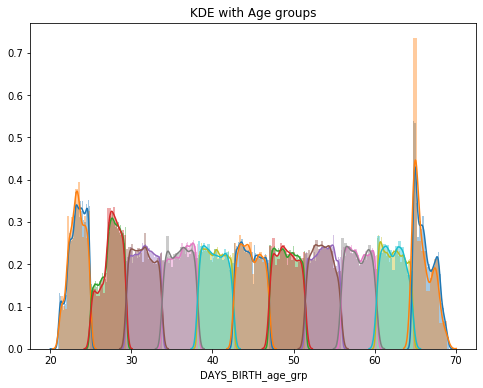

In [16]:
plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(f_app_train.loc[(f_app_train['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (f_app_train['TARGET'] == 0), 'DAYS_BIRTH_age_grp'], label = str(year_group_sorted[i]))
    
    sns.distplot(f_app_train.loc[(f_app_train['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (f_app_train['TARGET'] == 1), 'DAYS_BIRTH_age_grp'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

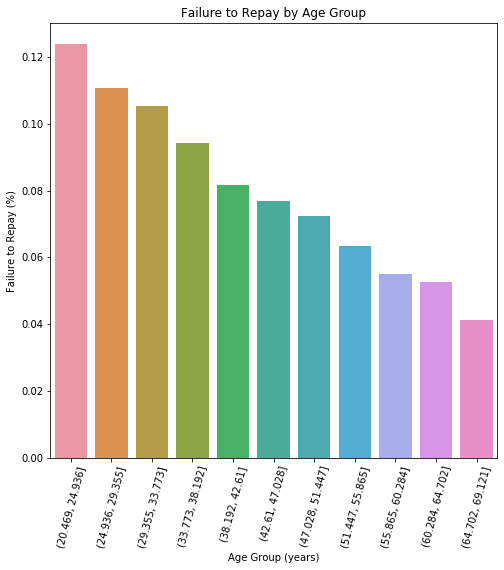

In [17]:
age_groups  = f_app_train.groupby('YEARS_BINNED').mean()
age_groups

plt.figure(figsize = (8, 8))


px = f_app_train.sort_values(by='YEARS_BINNED')['YEARS_BINNED'].unique()
py = age_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [26]:
#自 20 到 70 歲，切 11 個點 (得到 10 組)
begin=f_app_train['DAYS_BIRTH_age_grp']>=20
end=f_app_train['DAYS_BIRTH_age_grp']<=70
data=f_app_train[(begin&end)]

bin_cut =  11
f_app_train['YEARS_BINNED'] = pd.qcut(f_app_train['DAYS_BIRTH_age_grp'],bin_cut) 

# 顯示不同組的數量
print(f_app_train['YEARS_BINNED'].value_counts())
f_app_train.head()

(38.249, 41.455]    27969
(20.517, 27.838]    27969
(48.781, 52.981]    27960
(61.256, 69.121]    27956
(31.386, 34.923]    27955
(27.838, 31.386]    27954
(44.877, 48.781]    27953
(41.455, 44.877]    27950
(56.907, 61.256]    27949
(34.923, 38.249]    27949
(52.981, 56.907]    27947
Name: YEARS_BINNED, dtype: int64


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,DAYS_BIRTH_age_grp,age_group,YEARS_BINNED
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,False,25.920548,"(24.936, 29.355]","(20.517, 27.838]"
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,False,45.931507,"(42.61, 47.028]","(44.877, 48.781]"
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,52.180822,"(51.447, 55.865]","(48.781, 52.981]"
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,False,52.068493,"(51.447, 55.865]","(48.781, 52.981]"
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,False,54.608219,"(51.447, 55.865]","(52.981, 56.907]"


In [23]:
year_group_sorted = f_app_train.sort_values(by='YEARS_BINNED')['YEARS_BINNED'].unique()

year_group_sorted 

[(20.517, 27.838], (27.838, 31.386], (31.386, 34.923], (34.923, 38.249], (38.249, 41.455], ..., (44.877, 48.781], (48.781, 52.981], (52.981, 56.907], (56.907, 61.256], (61.256, 69.121]]
Length: 11
Categories (11, interval[float64]): [(20.517, 27.838] < (27.838, 31.386] < (31.386, 34.923] < (34.923, 38.249] ... (48.781, 52.981] < (52.981, 56.907] < (56.907, 61.256] < (61.256, 69.121]]

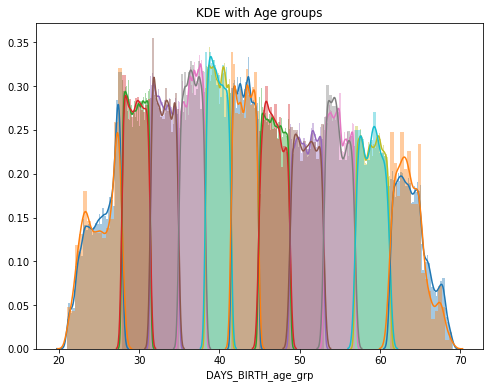

In [24]:
plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(f_app_train.loc[(f_app_train['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (f_app_train['TARGET'] == 0), 'DAYS_BIRTH_age_grp'], label = str(year_group_sorted[i]))
    
    sns.distplot(f_app_train.loc[(f_app_train['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (f_app_train['TARGET'] == 1), 'DAYS_BIRTH_age_grp'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

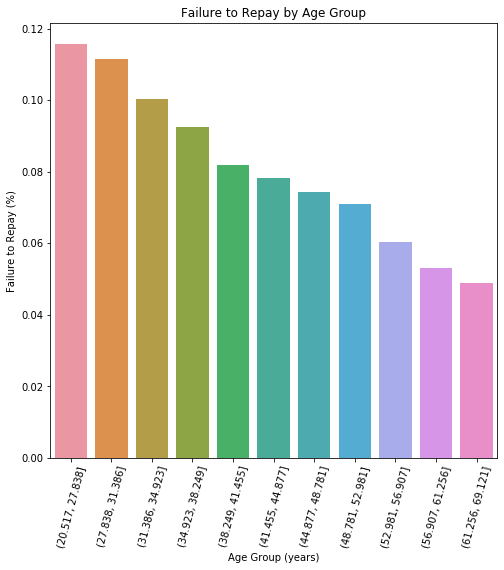

In [25]:
age_groups  = f_app_train.groupby('YEARS_BINNED').mean()
age_groups

plt.figure(figsize = (8, 8))


px = f_app_train.sort_values(by='YEARS_BINNED')['YEARS_BINNED'].unique()
py = age_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');